# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [1]:
# Imports
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import csv
import calendar
import webbrowser
from datetime import datetime

# Constants
DATA_FOLDER = 'Data/'


## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average per month* of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

In [2]:
'''
Functions needed to solve task 1
'''

#function to import excel file into a dataframe
def importdata(path,date):
    allpathFiles = glob.glob(DATA_FOLDER+path+'/*.csv')
    list_data = []
    for file in allpathFiles:
        excel = pd.read_csv(file,parse_dates=[date])
        list_data.append(excel)
    return pd.concat(list_data)

#function to add the month on a new column of a DataFrame
def add_month(df):
    copy_df = df.copy()
    months = [calendar.month_name[x.month] for x in copy_df.Date]
    copy_df['Month'] = months
    return copy_df

#founction which loc only the column within a country and a specified month
#return a dataframe
def chooseCountry_month(dataframe,country,descr,month):
    df = dataframe.loc[(dataframe['Country']==country) & (dataframe['Description']==descr)]
    #df = add_month(df)
    df_month = df.loc[(df['Month']==month)]
    return df_month

# Create a dataframe with the number of death, the new cases and the daily infos for a country and a specified month 
def getmonthresults(dataframe,country,month):
    if country =='Liberia':
        descr_kill ='Total death/s in confirmed cases'
        descr_cases ='Total confirmed cases'
    if country =='Guinea':
        descr_kill ='Total deaths of confirmed'
        descr_cases ='Total cases of confirmed'
    if country == 'Sierra Leone': 
        descr_kill ='death_confirmed'
        descr_cases ='cum_confirmed'
    
    df_kill = chooseCountry_month(dataframe,country,descr_kill,month)
    df_cases = chooseCountry_month(dataframe,country,descr_cases,month)
    
    #calculate the number of new cases and of new deaths for the all month
    res_kill = int(df_kill.iloc[len(df_kill)-1].Totals)-int(df_kill.iloc[0].Totals)
    res_cases = int(df_cases.iloc[len(df_cases)-1].Totals)-int(df_cases.iloc[0].Totals)
    #calculate the number of days counted which is last day of register - first day of register
    nb_day = df_kill.iloc[len(df_kill)-1].Date.day-df_kill.iloc[0].Date.day 
    

    # Sometimes the values in the dataframe are wrong due to the excelfiles which are not all the same!
    # We then get negative results. Therefor we replace them all by NaN ! 
    if(res_cases < 0)&(res_kill <0):
        monthreport = pd.DataFrame({'New cases':[np.nan],'Deaths':[np.nan],'daily average of New cases':[np.nan],'daily average of Deaths':[np.nan],'month':[month],'Country':[country]})
    elif(res_cases >= 0) &( res_kill <0):
        monthreport = pd.DataFrame({'New cases':[res_cases],'Deaths':[np.nan],'daily average of New cases':[res_cases/nb_day],'daily average of Deaths':[np.nan],'month':[month],'Country':[country]})
    elif(res_cases < 0) & (res_kill >= 0):
        monthreport = pd.DataFrame({'New cases':[np.nan],'Deaths':[res_kill],'daily average of New cases':[np.nan],'daily average of Deaths':[res_kill/nb_day],'month':[month],'Country':[country]})
    elif(nb_day == 0):
        monthreport = pd.DataFrame({'New cases':'notEnoughdatas','Deaths':'notEnoughdatas','daily average of New cases':'notEnoughdatas','daily average of Deaths':'notEnoughdatas','month':[month],'Country':[country]})
    else:    
        monthreport = pd.DataFrame({'New cases':[res_cases],'Deaths':[res_kill],'daily average of New cases':[res_cases/nb_day],'daily average of Deaths':[res_kill/nb_day],'month':[month],'Country':[country]})
    return monthreport

#check if the  month and the country is in the dataframe df
def checkData(df,month,country):
    check = df.loc[(df['Country']==country)& (df['Month']== month)]
    return check

#return a dataframe with all the infos(daily new cases, daily death) for each month and each country
def getResults(data):
    Countries = ['Guinea','Liberia','Sierra Leone']
    Months = ['January','February','March','April','May','June','July','August','September','October','November','December']
    results=[]
    compteur =0
    for country in Countries:
        for month in Months:
            if not(checkData(data,month,country).empty) : #check if the datas for the month and country exist 
                res = getmonthresults(data,country,month)
                results.append(res)  
    return pd.concat(results)
    

In [3]:

# import data from guinea
path_guinea = 'Ebola/guinea_data/'
data_guinea = importdata(path_guinea,'Date')

# set the new order / change the columns / keep only the relevant datas / add the name of the country
data_guinea = data_guinea[['Date', 'Description','Totals']]
data_guinea['Country'] = ['Guinea']*len(data_guinea)

#search for New cases and death!!   
#descr(newcases): "Total cases of confirmed"  // descr(deaths): "Total deaths of confirmed"
data_guinea = data_guinea.loc[(data_guinea.Description=='Total cases of confirmed')|(data_guinea.Description=='Total deaths of confirmed')]

   
#import data from liberia
path_liberia = 'Ebola/liberia_data/'
data_liberia = importdata(path_liberia,'Date')
# set the new order / change the columns / keep only the relevant datas / add the name of the country
data_liberia = data_liberia[['Date', 'Variable','National']]
data_liberia['Country'] = ['Liberia']*len(data_liberia)

#search for New cases and death!!    
#descr(newcases): "Total confirmed cases"  // descr(deaths): "Total death/s in confirmed cases"  
data_liberia = data_liberia.loc[(data_liberia.Variable=='Total confirmed cases')|(data_liberia.Variable=='Total death/s in confirmed cases')]

#change the name of the columns to be able merge the 3 data sets
data_liberia = data_liberia.rename(columns={'Date': 'Date', 'Variable': 'Description','National':'Totals'})

    
#import data from sierra leonne
path_sl = 'Ebola/sl_data/'
data_sl = importdata(path_sl,'date')
# set the new order / change the columns / keep only the relevant datas / add the name of the country
data_sl = data_sl[['date', 'variable','National']]
data_sl['Country'] = ['Sierra Leone']*len(data_sl)

#search for new cases and death    
#descr(newcases): "cum_confirmed"  // descr(deaths): "death_confirmed"
data_sl = data_sl.loc[(data_sl.variable=='cum_confirmed')|(data_sl.variable=='death_confirmed')]
#change the name of the columns to be able merge the 3 data sets
data_sl = data_sl.rename(columns={'date': 'Date', 'variable': 'Description','National':'Totals'})


#merge the 3 dataframe into ONE which we'll apply our analysis
dataFrame = [data_guinea,data_liberia,data_sl]
data = pd.concat(dataFrame)

# Replace the NaN by 0;
data = data.fillna(0)
#add a column with the month
data = add_month(data)

#get the results from the data set -> see the function
results = getResults(data)

#print the resuults
results

,Country,Deaths,New cases,daily average of Deaths,daily average of New cases,month
0,Guinea,109,212,4.03704,7.85185,August
0,Guinea,190,370,6.78571,13.2143,September
0,Guinea,notEnoughdatas,notEnoughdatas,notEnoughdatas,notEnoughdatas,October
0,Liberia,18,31,1.38462,2.38462,June
0,Liberia,36,44,1.44,1.76,July
0,Liberia,203,237,7.80769,9.11538,August
0,Liberia,538,519,18.5517,17.8966,September
0,Liberia,NaN,NaN,NaN,NaN,October
0,Liberia,0,367,0,13.1071,November
0,Liberia,0,NaN,0,NaN,December


## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

In [4]:
Sheet10_Meta = pd.read_excel(DATA_FOLDER +'microbiome/metadata.xls') 
allFiles = glob.glob(DATA_FOLDER + 'microbiome' + "/MID*.xls")
allFiles

['Data/microbiome/MID1.xls',
 'Data/microbiome/MID2.xls',
 'Data/microbiome/MID3.xls',
 'Data/microbiome/MID4.xls',
 'Data/microbiome/MID5.xls',
 'Data/microbiome/MID6.xls',
 'Data/microbiome/MID7.xls',
 'Data/microbiome/MID8.xls',
 'Data/microbiome/MID9.xls']

 2. Creating and filling the DataFrame
In order to iterate only once over the data folder, we will attach the metadata to each excel spreadsheet right after creating a DataFrame with it. This will allow the code to be shorter and clearer, but also to iterate only once on every line and therefore be more efficient. 

In [5]:
#Creating an empty DataFrame to store our data and initializing a counter.
Combined_data = pd.DataFrame()
K = 0
while (K < int(len(allFiles))):
    
    #Creating a DataFrame and filling it with the excel's data
    df = pd.read_excel(allFiles[K], header=None)
    
    #Getting the metadata of the corresponding spreadsheet
    df['BARCODE'] = Sheet10_Meta.at[int(K), 'BARCODE']
    df['GROUP'] = Sheet10_Meta.at[int(K), 'GROUP']
    df['SAMPLE'] = Sheet10_Meta.at[int(K),'SAMPLE']
    
    #Append the recently created DataFrame to our combined one
    Combined_data = Combined_data.append(df)
    
    K = K + 1
    
#Renaming the columns with meaningfull names
Combined_data.columns = ['Name', 'Value','BARCODE','GROUP','SAMPLE']
Combined_data.head()

,Name,Value,BARCODE,GROUP,SAMPLE
0,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",7,MID1,EXTRACTION CONTROL,NaN
1,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",2,MID1,EXTRACTION CONTROL,NaN
2,"Archaea ""Crenarchaeota"" Thermoprotei Sulfoloba...",3,MID1,EXTRACTION CONTROL,NaN
3,"Archaea ""Crenarchaeota"" Thermoprotei Thermopro...",3,MID1,EXTRACTION CONTROL,NaN
4,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",7,MID1,EXTRACTION CONTROL,NaN


        3. Cleaning and reindexing
At first we get rid of the NaN value, we must replace them by "unknown". In order to have a more meaningful and single index, we will reset it to be the name of the RNA sequence.

In [6]:
#Replacing the NaN values with unknwown
Combined_data = Combined_data.fillna('unknown')

#Reseting the index
Combined_data = Combined_data.set_index('Name')

#Showing the result
Combined_data

,Value,BARCODE,GROUP,SAMPLE
Name,,,,
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",7,MID1,EXTRACTION CONTROL,unknown
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus",2,MID1,EXTRACTION CONTROL,unknown
"Archaea ""Crenarchaeota"" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus",3,MID1,EXTRACTION CONTROL,unknown
"Archaea ""Crenarchaeota"" Thermoprotei Thermoproteales Thermofilaceae Thermofilum",3,MID1,EXTRACTION CONTROL,unknown
"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Methanocellales Methanocellaceae Methanocella",7,MID1,EXTRACTION CONTROL,unknown
"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Methanosarcinales Methanosarcinaceae Methanimicrococcus",1,MID1,EXTRACTION CONTROL,unknown
"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Methanosarcinales Methermicoccaceae Methermicoccus",1,MID1,EXTRACTION CONTROL,unknown
"Archaea ""Euryarchaeota"" Archaeoglobi Archaeoglobales Archaeoglobaceae Ferroglobus",1,MID1,EXTRACTION CONTROL,unknown
"Archaea ""Euryarchaeota"" Archaeoglobi Archaeoglobales Archaeoglobaceae Geoglobus",1,MID1,EXTRACTION CONTROL,unknown


## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

## For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

### Question 3.1

##### Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 

Assumptions: 
    - "For each exercise, please provide both a written explanation of the steps you will apply to manipulate the data, and the corresponding code." We assume that "written explanation can come in the form of commented code as well as text"
    - We assume that we must not describe the value range of attributes that contain string as we dont feel the length of strings or ASCI-values don't give any insight

In [7]:
''' 
Here is a sample of the information in the titanic dataframe
''' 

# Importing titanic.xls info with Pandas
titanic = pd.read_excel('Data/titanic.xls')

# printing only the 30 first and last rows of information
print(titanic.head)

<bound method NDFrame.head of       pclass  survived                                               name  \
0          1         1                      Allen, Miss. Elisabeth Walton   
1          1         1                     Allison, Master. Hudson Trevor   
2          1         0                       Allison, Miss. Helen Loraine   
3          1         0               Allison, Mr. Hudson Joshua Creighton   
4          1         0    Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
5          1         1                                Anderson, Mr. Harry   
6          1         1                  Andrews, Miss. Kornelia Theodosia   
7          1         0                             Andrews, Mr. Thomas Jr   
8          1         1      Appleton, Mrs. Edward Dale (Charlotte Lamson)   
9          1         0                            Artagaveytia, Mr. Ramon   
10         1         0                             Astor, Col. John Jacob   
11         1         1  Astor, Mrs. John Jacob

In [8]:
'''
To describe the INTENDED values and types of the data we will show you the titanic.html file that was provided to us
Notice:
    - 'age' is of type double, so someone can be 17.5 years old, mostly used with babies that are 0.x years old
    - 'cabin' is stored as integer, but it har characters and letters
    - By this model, embarked is stored as an integer, witch has to be interpreted as the 3 different embarkation ports
    - It says that 'boat' is stored as a integer even though it has spaces and letters, it should be stored as string
    
PS: it might be that the information stored as integer is supposed to be categorical data,
        ...because they have a "small" amount of valid options
''' 

# Display html info in Jupyter Notebook
from IPython.core.display import display, HTML
htmlFile = 'Data/titanic.html'
display(HTML(htmlFile))


Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


In [9]:
''' 
The default types of the data after import:
Notice:
    - the strings and characters are imported as objects
    - 'survived' is imported as int instead of double (which is in our opinion better since it's only 0 and 1
    - 'sex' is imported as object not integer because it is a string
'''

titanic.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [10]:
''' 
Below you can see the value range of the different numerical values.

name, sex, ticket, cabin, embarked, boat and home.dest is not included because they can't be quantified numerically.
''' 

titanic.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [11]:

'''
Additional information that is important to remember when manipulation the data
is if/where there are NaN values in the dataset
'''

# This displays the number of NaN there is in different attributes
print(pd.isnull(titanic).sum())

'''
Some of this data is missing while some is meant to describe 'No' or something of meaning.
Example:
    Cabin has 1014 NaN in its column, it might be that every passenger had a cabin and the data is missing.
    Or it could mean that most passengers did not have a cabin or a mix. The displayed titanic.html file 
    give us some insight if it is correct. It says that there are 0 NaN in the column. This indicates that
    there are 1014 people without a cabin. Boat has also 823 NaN's, while the titanic lists 0 NaN's. 
    It is probably because most of those who died probably weren't in a boat.
'''

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


"\nSome of this data is missing while some is meant to describe 'No' or something of meaning.\nExample:\n    Cabin has 1014 NaN in its column, it might be that every passenger had a cabin and the data is missing.\n    Or it could mean that most passengers did not have a cabin or a mix. The displayed titanic.html file \n    give us some insight if it is correct. It says that there are 0 NaN in the column. This indicates that\n    there are 1014 people without a cabin. Boat has also 823 NaN's, while the titanic lists 0 NaN's. \n    It is probably because most of those who died probably weren't in a boat.\n"

In [12]:
'''
What attributes should be stored as categorical information?

Categorical data is essentially 8-bit integers which means it can store up to 2^8 = 256 categories
Benefit is that it makes memory usage lower and it has a performance increase in calculations.
'''

print('Number of unique values in... :')
for attr in titanic:
    print("   {attr}: {u}".format(attr=attr, u=len(titanic[attr].unique())))

Number of unique values in... :
   pclass: 3
   survived: 2
   name: 1307
   sex: 2
   age: 99
   sibsp: 7
   parch: 8
   ticket: 939
   fare: 282
   cabin: 187
   embarked: 4
   boat: 29
   body: 122
   home.dest: 370


In [13]:
'''
We think it will be smart to categorize: 'pclass', 'survived', 'sex', 'cabin', 'embarked' and 'boat'
because they have under 256 categories and don't have a strong numerical value like 'age'
'survived' is a bordercase because it might be more practical to work with integers in some settings
'''

# changing the attributes to categorical data
titanic.pclass = titanic.pclass.astype('category')
titanic.survived = titanic.survived.astype('category')
titanic.sex = titanic.sex.astype('category')
titanic.cabin = titanic.cabin.astype('category')
titanic.embarked = titanic.embarked.astype('category')
titanic.boat = titanic.boat.astype('category')

#Illustrate the change by printing out the new types
titanic.dtypes

pclass       category
survived     category
name           object
sex          category
age           float64
sibsp           int64
parch           int64
ticket         object
fare          float64
cabin        category
embarked     category
boat         category
body          float64
home.dest      object
dtype: object

### Question 3.2
###### "Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. "

assumptions: 

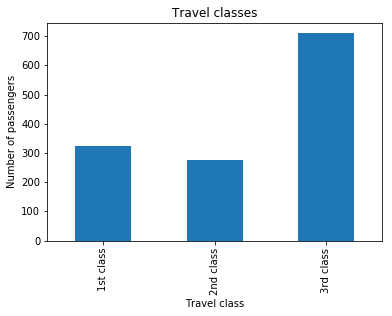

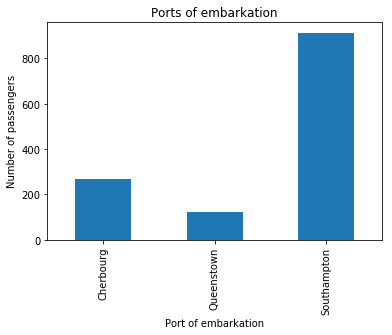

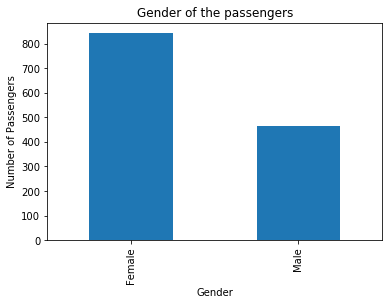

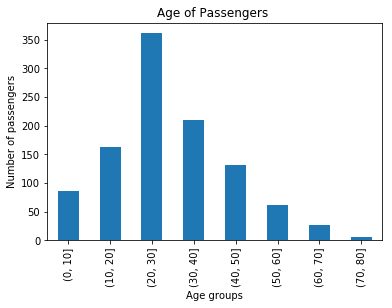

In [14]:

#Plotting the ratio different classes(1st, 2nd and 3rd class) the passengers have
pc = titanic.pclass.value_counts().sort_index().plot(kind='bar')
pc.set_title('Travel classes')
pc.set_ylabel('Number of passengers')
pc.set_xlabel('Travel class')
pc.set_xticklabels(('1st class', '2nd class', '3rd class'))
plt.show(pc)

#Plotting the amount of people that embarked from different cities(C=Cherbourg, Q=Queenstown, S=Southampton)
em = titanic.embarked.value_counts().sort_index().plot(kind='bar')
em.set_title('Ports of embarkation')
em.set_ylabel('Number of passengers')
em.set_xlabel('Port of embarkation')
em.set_xticklabels(('Cherbourg', 'Queenstown', 'Southampton'))
plt.show(em)

#Plotting what sex the passengers are
sex = titanic.sex.value_counts().plot(kind='bar')
sex.set_title('Gender of the passengers')
sex.set_ylabel('Number of Passengers')
sex.set_xlabel('Gender')
sex.set_xticklabels(('Female', 'Male'))
plt.show(sex)

#Plotting agegroup of passengers
bins = [0,10,20,30,40,50,60,70,80]
age_grouped = pd.DataFrame(pd.cut(titanic.age, bins))
ag = age_grouped.age.value_counts().sort_index().plot.bar()
ag.set_title('Age of Passengers ')
ag.set_ylabel('Number of passengers')
ag.set_xlabel('Age groups')
plt.show(ag)


### Question 3.3
###### Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.

assumptions: 
- Because we are tasked with categorizing persons by the floor of their cabin it was problematic that you had cabin input: "F E57" and "F G63". There were only 7 of these instances with conflicting cabinfloors. We also presumed that the was a floor "T". Even though there was only one instance, so it might have been a typo.
- We assume that you don't want to include people without cabinfloor

There are 288 passengers that have cabins and 1021 passengers without a cabin


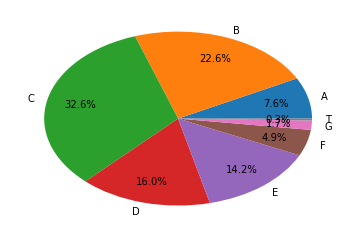

In [15]:
'''
Parsing the cabinfloor, into floors A, B, C, D, E, F, G, T and display in a pie chart

'''
#Dropping NaN (People without cabin)
cabin_floors = titanic.cabin.dropna()

# removes digits and spaces
cabin_floors = cabin_floors.str.replace(r'[\d ]+', '')
# removes duplicate letters and leave unique (CC -> C) (FG -> G)
cabin_floors = cabin_floors.str.replace(r'(.)(?=.*\1)', '')
# removes ambigous data from the dataset (FE -> NaN)(FG -> NaN)
cabin_floors = cabin_floors.str.replace(r'([A-Z]{1})\w+', 'NaN' )

# Recategorizing (Since we altered the entries, we messed with the categories)
cabin_floors = cabin_floors.astype('category')
# Removing NaN (uin this case ambigous data)
cabin_floors = cabin_floors.cat.remove_categories('NaN')
cabin_floors = cabin_floors.dropna()

# Preparing data for plt.pie
numberOfCabinPlaces = cabin_floors.count()
grouped = cabin_floors.groupby(cabin_floors).count()
sizes = np.array(grouped)
labels = np.array(grouped.index)

# Plotting the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', pctdistance=0.75, labeldistance=1.1)
print("There are {cabin} passengers that have cabins and {nocabin} passengers without a cabin"
      .format(cabin=numberOfCabinPlaces, nocabin=(len(titanic) - numberOfCabinPlaces)))

### Question 3.4
###### For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.

assumptions: 

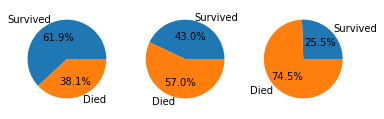

In [16]:
# function that returns the number of people that survived and died given a specific travelclass
def survivedPerClass(pclass):
    survived = len(titanic.survived[titanic.survived == 1][titanic.pclass == pclass])
    died = len(titanic.survived[titanic.survived == 0][titanic.pclass == pclass])
    return [survived, died]

# Fixing the layout horizontal
the_grid = plt.GridSpec(1, 3)
labels = ["Survived", "Died"]

# Each iteration plots a pie chart
for p in titanic.pclass.unique():
    sizes = survivedPerClass(p)
    plt.subplot(the_grid[0, p-1], aspect=1 )
    plt.pie(sizes, labels=labels, autopct='%1.1f%%')
    
plt.show()

### Question 3.5
##### "Calculate the proportion of the passengers that survived by travel class and sex. Present your results in a single histogram."

assumptions: 
    1. By "proportions" We assume it is a likelyhood-percentage of surviving

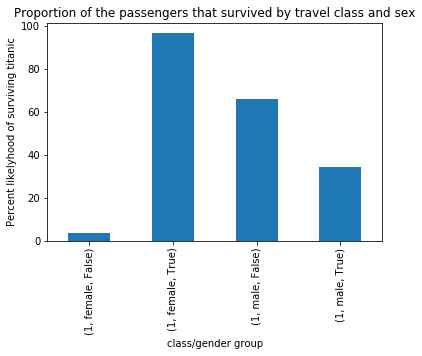

In [23]:
# group by selected data and get a count for each category
survivalrate = titanic.groupby(['pclass', 'sex', 'survived']).size()

# calculate percentage
survivalpercentage = survivalrate.groupby(level=['pclass', 'sex']).apply(lambda x: x / x.sum() * 100)

# plotting in a histogram
histogram = survivalpercentage.filter(like='1', axis=0).plot(kind='bar')
histogram.set_title('Proportion of the passengers that survived by travel class and sex')
histogram.set_ylabel('Percent likelyhood of surviving titanic')
histogram.set_xlabel('class/gender group')
plt.show(histogram)

### Question 3.6
##### "Create 2 equally populated age categories and calculate survival proportions by age category, travel class and sex. Present your results in a DataFrame with unique index."

assumptions: 
1. By "proportions" we assume it is a likelyhood-percentage of surviving
2. To create 2 equally populated age categories; we will find the median and round up from the median to nearest whole year difference before splitting.

In [24]:
#drop NaN rows
age_without_nan = titanic.age.dropna()

#categorizing
age_categories = pd.qcut(age_without_nan, 2, labels=["Younger", "Older"])

#Numbers to explain difference
median = int(np.float64(age_without_nan.median()))
amount = int(age_without_nan[median])
print("The Median age is {median} years old".format(median = median))
print("and there are {amount} passengers that are {median} year old \n".format(amount=amount, median=median))

print(age_categories.groupby(age_categories).count())
print("\nAs you can see the pd.qcut does not cut into entirely equal sized bins, because the age is of a discreet nature")


The Median age is 28 years old
and there are 35 passengers that are 28 year old 

age
Older      510
Younger    536
Name: age, dtype: int64

As you can see the pd.qcut does not cut into entirely equal sized bins, because the age is of a discreet nature


In [25]:
# imported for the sake of surpressing some warnings
import warnings
warnings.filterwarnings('ignore')

# extract relevant attributes
csas = titanic[['pclass', 'sex', 'age', 'survived']]
csas.dropna(subset=['age'], inplace=True)

# Defining the categories
csas['age_group'] = csas.age > csas.age.median()
csas['age_group'] = csas['age_group'].map(lambda age_category: 'older' if age_category else "younger")

# Converting to int to make it able to aggregate and give percentage
csas.survived = csas.survived.astype(int)

g_categories = csas.groupby(['pclass', 'age_group', 'sex'])
result = pd.DataFrame(g_categories.survived.mean()).rename(columns={'survived': 'survived proportion'})

# reset current index and spesify the unique index
result.reset_index(inplace=True)
unique_index = result.pclass.astype(str) + ': ' + result.age_group.astype(str) + ' ' + result.sex.astype(str)

# Finalize the unique index dataframe
result_w_unique = result[['survived proportion']]
result_w_unique.set_index(unique_index, inplace=True)
print(result_w_unique)


                   survived proportion
1: older female               0.967391
1: older male                 0.302521
1: younger female             0.951220
1: younger male               0.531250
2: older female               0.872340
2: older male                 0.083333
2: younger female             0.910714
2: younger male               0.216216
3: older female               0.372093
3: older male                 0.144000
3: younger female             0.513761
3: younger male               0.183036
